In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Fetch Data

In [3]:
mnist = fetch_openml("mnist_784", version = 1, cache = True, as_frame = True)


E:\Anaconda\envs\Machine_LearningSCikit\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Data exploration

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [4]:
X = mnist["data"]
y = mnist ["target"].astype(np.uint8) #Converts string labels to integers

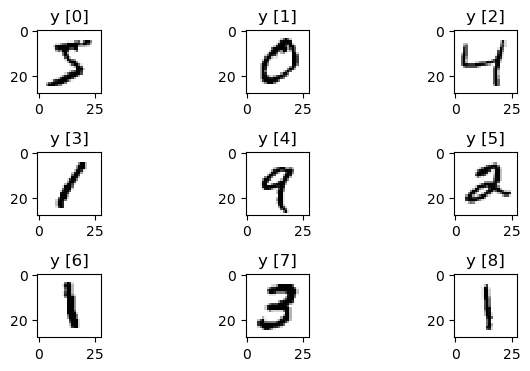

In [7]:
image = mnist.data.to_numpy()

for i in range(9):
    plt.subplot(431+i)
    plt.title('y {}'.format([i]))
    plt.imshow((image[0+i].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.tight_layout()


In [91]:
#verify if y[0] = 5 or not
y[0]

5

# Split Data

In [5]:
#use train_test_split to split to training and temporary data. Temporary data will be validation and test dataset.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

#use split method again to split temporary data to validation and test dataset
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
#Verify the split ratio and shape
print('Training set images: ' + str(X_train.shape))  

print('Validation set images: ' + str(X_valid.shape))

print('Testing set images:  ' + str(X_test.shape))

Training set images: (56000, 784)
Validation set images: (7000, 784)
Testing set images:  (7000, 784)


# preprocessing step

In [7]:
#(Not necessary since we only have one step)
pipe = Pipeline([
    ('Scaler', StandardScaler())    
])

In [8]:
#Standardizing the data
X_train_scaled = pipe.fit_transform(X_train)
X_valid_scaled = pipe.transform(X_valid) 
X_test_scaled = pipe.transform(X_test)   

# Regression Models

# Lasso model


In [10]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(X_train_scaled, y_train)

lasso_val_predict = lasso.predict(X_valid_scaled)
lasso_val_rmse = np.sqrt(mean_squared_error(y_valid, lasso_val_predict))


print("Lasso Regression Mean Squared Error on Validation Set:", lasso_val_rmse)



Lasso Regression Mean Squared Error on Validation Set: 1.9324509767043834


# Linear regression

In [11]:
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()
Linear.fit(X_train_scaled, y_train)

linear_val_predict = Linear.predict(X_valid_scaled)
linear_val_rmse = np.sqrt(mean_squared_error(y_valid, linear_val_predict))

print("Linear Regression Mean Squared Error on Validation Set:", linear_val_rmse)


Linear Regression Mean Squared Error on Validation Set: 7941000144.482505


# Ridge

In [12]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

ridge.fit(X_train_scaled, y_train)

ridge_val_predict = ridge.predict(X_valid_scaled)
ridge_val_rmse = np.sqrt(mean_squared_error(y_valid, ridge_val_predict))

print("Ridge Regression Mean Squared Error on Validation Set:", ridge_val_rmse)


Ridge Regression Mean Squared Error on Validation Set: 1.8904417507496183


# Elastic Net

In [14]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=1.0, l1_ratio=0.5)

en.fit(X_train_scaled, y_train)

en_val_predict = en.predict(X_valid_scaled)
en_val_rmse = np.sqrt(mean_squared_error(y_valid, en_val_predict))

print("Elastic Net Regression Mean Squared Error on Validation Set:", en_val_rmse)


Elastic Net Regression Mean Squared Error on Validation Set: 2.428512131097474


# Fine Tune Hyperparameters For Lasso, Ridge and Elastic Net

In [38]:
from sklearn.model_selection import GridSearchCV

# Model parameters adjustment
ridge_params = {'alpha': [0.1, 1.0, 2, 4, 6, 10.0]}
lasso_params = {'alpha': [0.005, 0.01, 0.1, 0.105, 1.0]}
elastic_net_params = {'alpha': [0.01, 0.1, 1.0],
                     'l1_ratio': [0.1, 0.5, 0.9]}

# USE GridSearchCV
ridge_grid_search = GridSearchCV(Ridge(), ridge_params, cv=5)
lasso_grid_search = GridSearchCV(Lasso(), lasso_params, cv=5)
elastic_net_grid_search = GridSearchCV(ElasticNet(), elastic_net_params, cv=5)

ridge_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)
elastic_net_grid_search.fit(X_train, y_train)

# Find best parameters
best_ridge_params = ridge_grid_search.best_params_
best_lasso_params = lasso_grid_search.best_params_
best_elastic_net_params = elastic_net_grid_search.best_params_

print('ridge best parameters: ',best_ridge_params)
print('lasso best parameters: ',best_lasso_params)
print('elastic net best parameters: ',best_elastic_net_params)

ridge best parameters:  {'alpha': 10.0}
lasso best parameters:  {'alpha': 0.105}
elastic net best parameters:  {'alpha': 1.0, 'l1_ratio': 0.1}


# Re-train each model with best hyperparameters

In [47]:
lasso_best = Lasso(**lasso_grid_search.best_params_) #unpack dictionary of hyperparameters with **
lasso_best.fit(X_train_scaled, y_train)


Lasso(alpha=0.105)

In [48]:
ridge_best = Ridge(**ridge_grid_search.best_params_)
ridge_best.fit(X_train_scaled, y_train)

Ridge(alpha=10.0)

In [49]:
elastic_net_best = ElasticNet(**elastic_net_grid_search.best_params_)
elastic_net_best.fit(X_train_scaled, y_train)

ElasticNet(l1_ratio=0.1)

# Compare each models perfomance

In [85]:
# Make predictions
lasso_val_best_pred = lasso_best.predict(X_valid_scaled)
ridge_val_best_pred = ridge_best.predict(X_valid_scaled)
elastic_net_val_best_pred = elastic_net_best.predict(X_valid_scaled)


#Validation Score of best parameters
lasso_val_rmse = np.sqrt(mean_squared_error(y_valid, lasso_val_best_pred))
ridge_val_rmse = np.sqrt(mean_squared_error(y_valid, ridge_val_best_pred))
elastic_net_val_rmse = np.sqrt(mean_squared_error(y_valid, elastic_net_val_best_pred))
linear_val_rmse = np.sqrt(linear_val_mse)

print("Lasso RMSE on validation set:", lasso_val_rmse)
print("Ridge RMSE on validation set:", ridge_val_rmse)
print("Elastic Net RMSE on validation set:", elastic_net_val_rmse)
print("Linear RMSE on validation set:", linear_val_rmse)

Lasso RMSE on validation set: 1.9400353819706901
Ridge RMSE on validation set: 1.8899348369623383
Elastic Net RMSE on validation set: 1.9782614219577686
Linear RMSE on validation set: 9019057275.901545


# Select Best Regression Model & Evaluate on final testing

In [90]:
# Finding best model from all models
best_model = min([
    ('Lasso', lasso_val_rmse),
    ('Ridge', ridge_val_rmse),
    ('Linear Regression', linear_val_rmse),
    ('Elastic Net', elastic_net_val_rmse)
], key=lambda x: x[1])[0]

print("Best model based on validation rmse:", best_model)


# Make predictions on test data from best model
if best_model == 'Lasso':
    y_test_pred = lasso_best.predict(X_test_scaled)
    y_mse = mean_squared_error(y_test, y_test_pred, squared=False)

elif best_model == 'Ridge':
    y_test_pred = ridge_best.predict(X_test_scaled)
    y_mse = mean_squared_error(y_test, y_test_pred, squared=False)
 
elif best_model == 'Linear Regression':
    y_test_pred = elastic_best.predict(X_test_scaled)
    y_mse = mean_squared_error(y_test, y_test_pred, squared=False)
    
else:
    y_test_pred = Linear.predict(X_test_scaled)
    y_mse = mean_squared_error(y_test, y_test_pred, squared=False)
    

print('Test Mean squared error(MSE) of the best model: ',y_mse)

# Accuracy and percentage of error
percentage_error = (y_mse / y_test.mean()) * 100
print(f"Percentage of error from predictions: {percentage_error:.2f}%")

Best model based on validation rmse: Ridge
Test Mean squared error(MSE) of the best model:  1.7754064892427603
Percentage of error from predictions: 40.07%


MNIST is typically used for classification tasks, where logistic regression, neural networks, or other classifiers are more suitable than regression models. Lasso, ridge and elastic net can be adapted to classifications tasks but in this case we are attempting with their regression models.

# Classification models

In [11]:
# To display the perfomance of classification model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

# MLPClassifier

Iteration 1, loss = 0.35968382
Iteration 2, loss = 0.14286098
Iteration 3, loss = 0.09679468
Iteration 4, loss = 0.07296322
Iteration 5, loss = 0.05671087
Iteration 6, loss = 0.04285170
Iteration 7, loss = 0.03468458
Iteration 8, loss = 0.02707802
Iteration 9, loss = 0.02218328
Iteration 10, loss = 0.01702396
Iteration 11, loss = 0.01336407
Iteration 12, loss = 0.01092694
Iteration 13, loss = 0.00892587
Iteration 14, loss = 0.00715644
Iteration 15, loss = 0.00595701
Accuracy: 0.9704285714285714


E:\Anaconda\envs\Machine_LearningSCikit\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


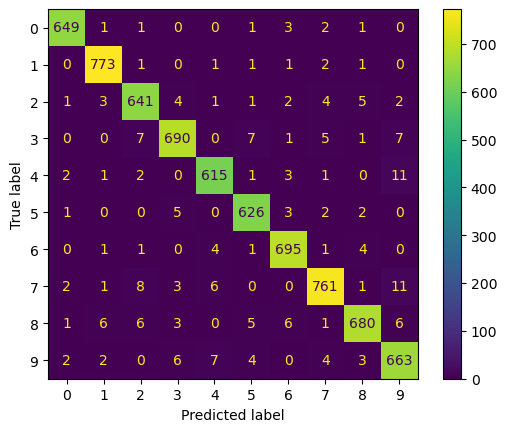

In [12]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=15, alpha=1e-4,
                        solver='adam', verbose=10, random_state=42, tol=1e-4)
mlp_clf.fit(X_train_scaled, y_train)

mlp_val_pred = mlp_clf.predict(X_valid_scaled)

mlp_accuracy = accuracy_score(y_valid, mlp_val_pred)
print("Accuracy:", mlp_accuracy)

display_confusion_matrix(y_valid, mlp_val_pred)

# Logistic Regression

E:\Anaconda\envs\Machine_LearningSCikit\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9171428571428571


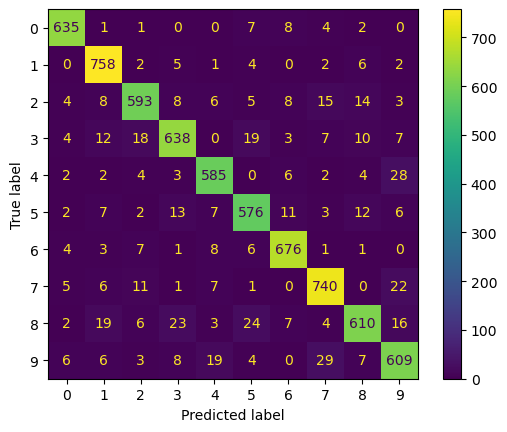

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=15)
log_reg.fit(X_train_scaled, y_train)

log_reg_val_pred = log_reg.predict(X_valid_scaled)

log_accuracy = accuracy_score(y_valid, log_reg_val_pred)
print("Accuracy:", log_accuracy)
display_confusion_matrix(y_valid, log_reg_val_pred)

# Find best hyperparameters for classification models

In [98]:
# Beware! This process will run a long time!
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu', 'tanh','logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [10, 15, 20, 50]
}

log_reg_param_grid = {
    'C': [0.01, 0.1, 1.0],
    'max_iter': [10, 15, 20, 50]
}

mlp_grid_search = GridSearchCV(MLPClassifier(random_state=42), mlp_param_grid, cv=3, verbose=2, n_jobs=-1)
mlp_grid_search.fit(X_train_scaled, y_train)

mlp_best_params = mlp_grid_search.best_params_
mlp_best_model = mlp_grid_search.best_estimator_


log_reg_grid_search = GridSearchCV(LogisticRegression(random_state=42), log_reg_param_grid, cv=3, verbose=2, n_jobs=-1)
log_reg_grid_search.fit(X_train_scaled, y_train)

log_reg_best_params = log_reg_grid_search.best_params_
log_reg_best_model = log_reg_grid_search.best_estimator_



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits


E:\Anaconda\envs\Machine_LearningSCikit\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
#Predict validation data
mlp_best_pred = mlp_best_model.predict(X_valid_scaled)
log_best_pred = log_reg_best_model.predict(X_valid_scaled)

#Verify accuracy
mlp_accuracy = accuracy_score(y_valid, mlp_best_pred)
log_accuracy = accuracy_score(y_valid, log_best_pred)

#Print best parameters & accuracy
print("MLPClassifier Best Parameters:", mlp_best_params)
print("MLPClassifier validation Accuracy:", mlp_accuracy)

print("Logistic Regression Best Parameters:", log_reg_best_params)
print("Logistic Regression validation Accuracy:", log_accuracy)

MLPClassifier Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (200,), 'max_iter': 50}
MLPClassifier validation Accuracy: 0.9755714285714285
Logistic Regression Best Parameters: {'C': 0.01, 'max_iter': 50}
Logistic Regression validation Accuracy: 0.919


# Best Classification model to use on final testing

We can see through observation that MLPClassifier has a better accuracy than Logistic Regression, which give much lesser loss in predicting unseen data, therefore, we will choose MLPClassifier to predict our test data for unseen data.

In [109]:
#Predict test data with MLPClassifier
mlp_test_pred = mlp_best_model.predict(X_test_scaled)
mlp_test_accuracy = accuracy_score(y_test, mlp_test_pred)

print("MLPClassifier test Accuracy:", mlp_test_accuracy)

MLPClassifier test Accuracy: 0.9752857142857143


# Regression model vs Classification model, MNIST_784 dataset

We will choose MLPClassifier as our chosen model to compete against the chosen Regression model.

The best regression model is Ridge regression as it has shown to win against other regression models in perfomance while using MNIST 784 dataset.

In [111]:
Ridge_accuracy = 100 -percentage_error
print(f"Ridge Regression Test Accuracy: {Ridge_accuracy:.2f}%")

print(f"MLPClassifier Test Accuracy: {(100 * mlp_test_accuracy):.2f}%")


Ridge Regression Test Accuracy: 59.93%
MLPClassifier Test Accuracy: 97.53%


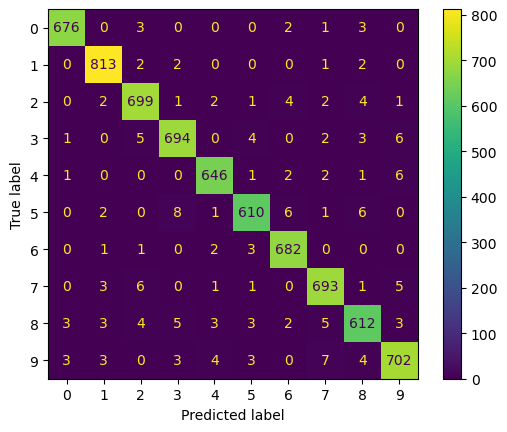

In [112]:
display_confusion_matrix(y_test, mlp_test_pred)

# Conclusion

Regression models is not suitable to use for MNIST_784 as the dataset is not intended for regression tasks. MNIST_784 is specifically designed for classifications tasks because in contrary to a regression task where the goal is to predict a continuous value, MNIST_784 is made up of handwritten digits images, thus, making classification tasks more primarily. Since for a classifier, given an MNIST image the classifier can predict whetter it represent the digit 5 or not. A regression task would rather continue predict the exact pixel intensity value of a specific pixel in an MNIST image.

Comparing results we see that the best classifier yields better predictions with a 97.53% accuracy while the best regression yields 59.93% accuracy.

For classifiers, results where noted down that for each more iteration it runs through the more accurate predictions. 
i.e the increase in accuracy rate is dependent on the number of iterations, if there is a limit is left to explore.